In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from millify import millify

In [9]:
file_path = r"C:\Users\Sujal Karmakar\Desktop\Desktop\Data Analyst\Python\DataAnalysis practice with my Instagram scraped dataset\ig_profile_data\all_usernames_profile_data_copy.xlsx"

df = pd.read_excel(file_path)

# filtering valid labels only

# professional label should not be nan
df = df[df["Professional Label"].notna()]

label_counts = df["Professional Label"].value_counts()

# the count of label should atleast be 5
valid_labels = label_counts[label_counts >= 5].index

df = df[df["Professional Label"].isin(valid_labels)]

# fiiling 0 to each nan values
df["Followers Count"] = df["Followers Count"].fillna(0)

df["Following Count"] = df["Following Count"].fillna(0)

# creating a M foramt for followers and following count
df["followers formatted"] = df["Followers Count"].apply(
    lambda x: millify(x) if pd.notna(x) else 0
)

df["Following formatted"] = df["Following Count"].apply(
    lambda x: millify(x) if pd.notna(x) else 0
)

# df["Following formatted"]

# df.info()

In [ ]:
# Drop rows where Followers Count is missing
df = df.dropna(subset=["Followers Count"])

# Calculating where 80% of the users followers count lie
q1 = df["Followers Count"].quantile(
    0.10
)  # q1, It gives a follower count such that 25% of usernames have less than or equal to that count.
q3 = df["Followers Count"].quantile(
    0.90
)  # q3, , It gives a follower count such that 25% of usernames have less than or equal to that count.
print("q1", q1)  # 25% of users have followers ≤ 2177
print("q3", q3)  # 75% of users have followers ≤ 1000000
iqr = q3 - q1

lower_bound = q1
upper_bound = q3

# Filter out extreme values
filtered_df = df[
    (df["Followers Count"] >= lower_bound) & (df["Followers Count"] <= upper_bound)
]

# Recalculate label counts in filtered data
label_counts_after_filter = filtered_df["Professional Label"].value_counts()

# Keep only labels with count >= 5
valid_labels_after_filter = label_counts_after_filter[
    label_counts_after_filter >= 5
].index

filtered_df = filtered_df[
    filtered_df["Professional Label"].isin(valid_labels_after_filter)
]

# filtered_df.sample(5)

q1 2177.4000000000005
q3 1000000.0


C:\Users\Sujal Karmakar\AppData\Local\Temp\ipykernel_14976\3621420176.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


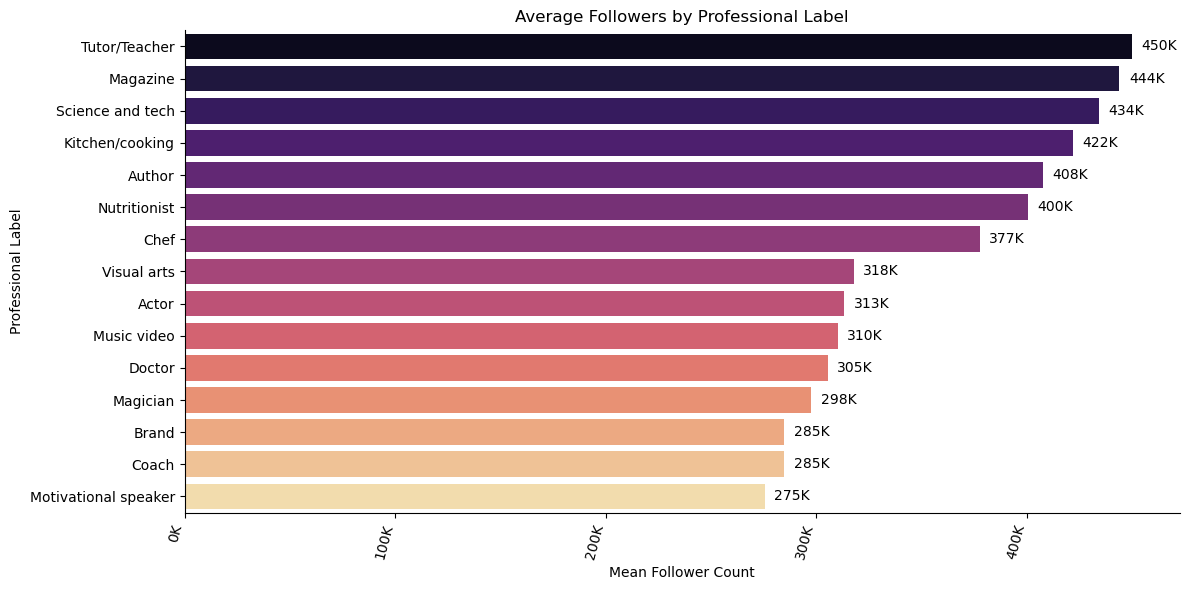

In [19]:
professionals = filtered_df[
    filtered_df["Professional Label"].notnull()
].copy()  # include usernames with professional lables

top_professionals = professionals.sort_values(by="Followers Count", ascending=False)

top_professionals = top_professionals[top_professionals["Profile Bio"].notnull()].copy()

top_professionals = top_professionals[
    ["Username", "Followers Count", "Professional Label", "Profile Bio", "Is Verified"]
]

label_grouped = (
    top_professionals.groupby("Professional Label")
    .agg(Mean_Follower_Count=("Followers Count", "mean"))
    .reset_index()
)

# label_grouped = label_grouped.rename(columns={'Followers Count': 'Mean Follower Count'}) alternative method

label_grouped = label_grouped.sort_values(by="Mean_Follower_Count", ascending=False)

label_grouped = label_grouped.head(15)

label_grouped.set_index("Professional Label", inplace=True)

from matplotlib.ticker import FuncFormatter

label_grouped = label_grouped.sort_values(by="Mean_Follower_Count", ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Mean_Follower_Count",
    y=label_grouped.index,
    data=label_grouped,
    palette="magma_r",
)


# Add labels and title
plt.xlabel("Mean Follower Count")
plt.ylabel("Professional Label")
plt.title("Average Followers by Professional Label")

plt.gca().invert_yaxis()
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Apply FuncFormatter to display x-axis ticks in millions
formatter = FuncFormatter(lambda x, _: f"{x/1e3:.0f}K")
plt.gca().xaxis.set_major_formatter(formatter)

plt.xticks(rotation=75, ha="right")

# Add text labels to each bar
for index, value in enumerate(label_grouped["Mean_Follower_Count"]):
    plt.text(
        value
        + 0.01
        * label_grouped[
            "Mean_Follower_Count"
        ].max(),  # "0.01" is not for adding but a bit to the right of the bar
        index,  # y-position
        f"{value / 1e3:.0f}K",  # formatted label
        va="center",
        ha="left",
        fontsize=10,
        color="black",
    )


# Show the plot
plt.tight_layout()
plt.show()

,Professional Label,Count
0,Actor,148
1,Advertising/marketing,11
2,Agriculture,3
3,Architectural designer,14
4,Art,24
5,Artist,807
6,Arts & entertainment,19
7,Author,10
8,"Beauty, cosmetic & personal care",12
9,Blogger,138
